In [1]:
%matplotlib inline
import numpy as np
import pandas as pd
import scipy
import sklearn
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
yelp = pd.read_csv('yelp_labelled.txt', names=['sentence', 'label'], sep='\t')
yelp.iloc[0]

sentence    Wow... Loved this place.
label                              1
Name: 0, dtype: object

In [3]:
keywords = ['generous', 'amazing', 'awesome', 'nice', 'clean', 'perfect',
           'friendly','pleased','perfectly']

for key in keywords:
    # Note that we add spaces around the key so that we're getting the word,
    # not just pattern matching.
    yelp[str(key)] = yelp.sentence.str.contains(
        ' ' + str(key) + ' ',
        case=False
    )

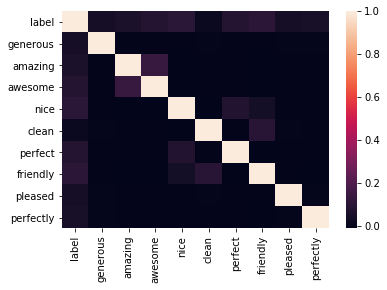

In [4]:
sns.heatmap(yelp.corr())

In [5]:
data = yelp[keywords]
target = yelp['label']

In [6]:
# Our data is binary / boolean, so we're importing the Bernoulli classifier.
from sklearn.naive_bayes import BernoulliNB

# Instantiate our model and store it in a new variable.
bnb = BernoulliNB()

# Fit our model to the data.
bnb.fit(data, target)

# Classify, storing the result in a new variable.
y_pred = bnb.predict(data)

# Display our results.
print("Number of mislabeled points out of a total {} points : {}".format(
    data.shape[0],
    (target != y_pred).sum()
))

Number of mislabeled points out of a total 1000 points : 450
